In [1]:
import pandas as pd
import pm4py

import matplotlib.pyplot as plt

In [2]:
#File type transformation
read_file = pd.read_csv("event_log.txt",sep='\t')
read_file.to_csv('event_log.csv', index=None, sep = ';')

In [3]:
#PM4PY handling
def view_simulation_bpmn(file_path):
    dataframe = pd.read_csv(file_path, sep=';')
    dataframe = pm4py.format_dataframe(dataframe, case_id='LogID', activity_key='Event', timestamp_key='Time')
#     event_log = pm4py.convert_to_event_log(dataframe)
#     print(event_log)
    process_tree = pm4py.discover_bpmn_inductive(dataframe)
    pm4py.view_bpmn(process_tree)

C:\Users\Arthur Siu\AppData\Local\Temp\ipykernel_44368\1962926664.py:4: DeprecatedWarning: format_dataframe is deprecated as of 2.3.0 and will be removed in 3.0.0. the format_dataframe function does not need application anymore.
  dataframe = pm4py.format_dataframe(dataframe, case_id='LogID', activity_key='Event', timestamp_key='Time')


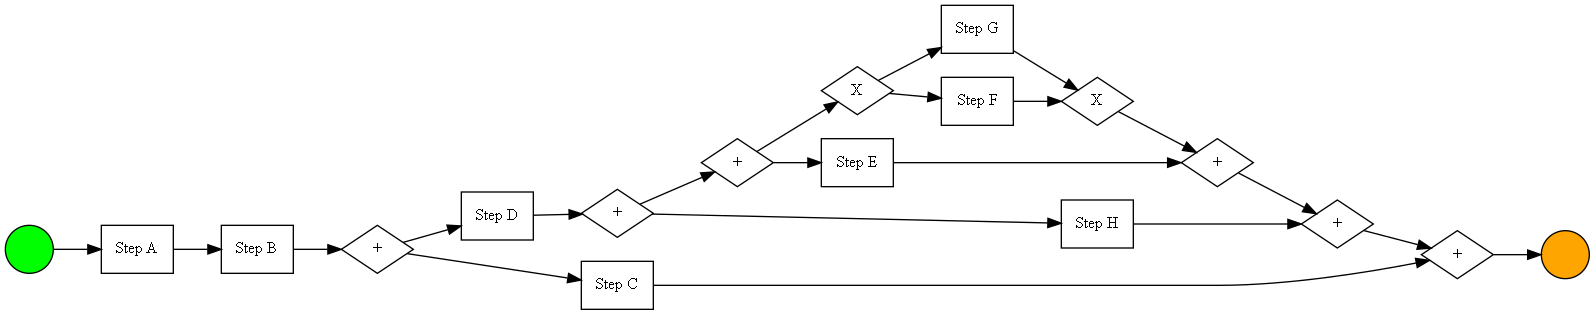

In [4]:
view_simulation_bpmn("event_log.csv")

In [5]:
def view_simulation_petri_net(file_path):
    dataframe = pd.read_csv(file_path, sep=';')
    dataframe = pm4py.format_dataframe(dataframe, case_id='LogID', activity_key='Event', timestamp_key='Time')
    pn, im, fm = pm4py.discover_petri_net_inductive(dataframe)
    pm4py.view_petri_net(pn, im, fm)

C:\Users\Arthur Siu\AppData\Local\Temp\ipykernel_44368\4054284697.py:3: DeprecatedWarning: format_dataframe is deprecated as of 2.3.0 and will be removed in 3.0.0. the format_dataframe function does not need application anymore.
  dataframe = pm4py.format_dataframe(dataframe, case_id='LogID', activity_key='Event', timestamp_key='Time')


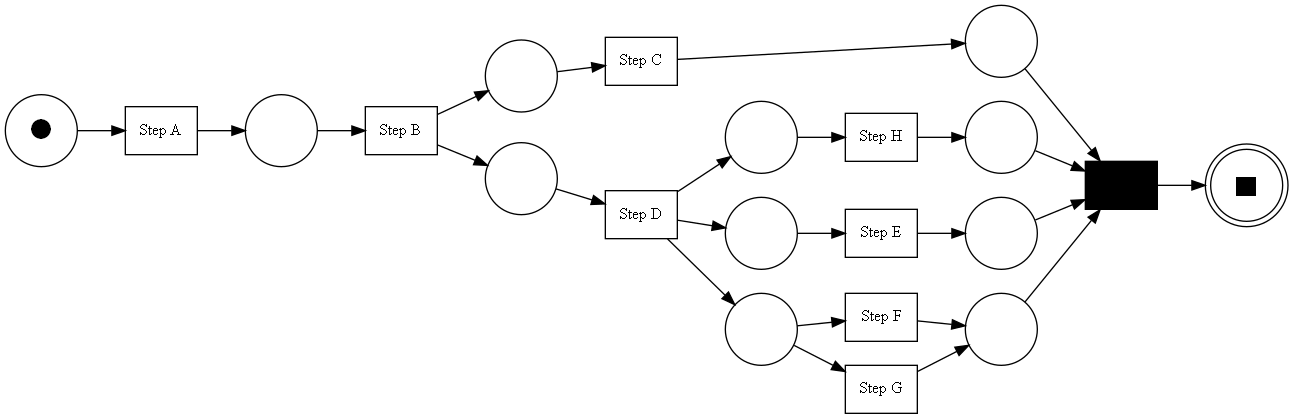

In [6]:
view_simulation_petri_net("event_log.csv")

In [7]:
dataframe = pd.read_csv("event_log.csv", sep=';')
dataframe = pm4py.format_dataframe(dataframe, case_id='LogID', activity_key='Event', timestamp_key='Time')
pn, im, fm = pm4py.discover_petri_net_inductive(dataframe)
pm4py.conformance_diagnostics_token_based_replay(dataframe, pn, im, fm)

C:\Users\Arthur Siu\AppData\Local\Temp\ipykernel_44368\552790737.py:2: DeprecatedWarning: format_dataframe is deprecated as of 2.3.0 and will be removed in 3.0.0. the format_dataframe function does not need application anymore.
  dataframe = pm4py.format_dataframe(dataframe, case_id='LogID', activity_key='Event', timestamp_key='Time')


replaying log with TBR, completed variants ::   0%|          | 0/8 [00:00<?, ?it/s]

[{'trace_is_fit': True,
  'trace_fitness': 1.0,
  'activated_transitions': [(1681e481-b707-4967-8724-2463d2724d89, 'Step A'),
   (0667e16e-231a-4954-ab8c-df70ca5ac9b0, 'Step B'),
   (1b1f50d0-f948-4408-80a0-e40a5ea80064, 'Step C'),
   (9ee2c73e-faa6-4677-8f67-70e9ab604715, 'Step D'),
   (847301f4-b514-4be6-9ca2-e3d6b605a2aa, 'Step F'),
   (e0b8b050-ad06-4926-8c10-38b3333dbf28, 'Step H'),
   (50a61ffd-78db-4886-b750-f8a6ac4b8ddc, 'Step E'),
   (tauJoin_2, None)],
  'reached_marking': ['sink:1'],
  'enabled_transitions_in_marking': set(),
  'transitions_with_problems': [],
  'missing_tokens': 0,
  'consumed_tokens': 12,
  'remaining_tokens': 0,
  'produced_tokens': 12},
 {'trace_is_fit': True,
  'trace_fitness': 1.0,
  'activated_transitions': [(1681e481-b707-4967-8724-2463d2724d89, 'Step A'),
   (0667e16e-231a-4954-ab8c-df70ca5ac9b0, 'Step B'),
   (1b1f50d0-f948-4408-80a0-e40a5ea80064, 'Step C'),
   (9ee2c73e-faa6-4677-8f67-70e9ab604715, 'Step D'),
   (666bc586-4f32-4cff-93dd-7a3b754065

C:\Users\Arthur Siu\AppData\Local\Temp\ipykernel_44368\3104394481.py:2: DeprecatedWarning: format_dataframe is deprecated as of 2.3.0 and will be removed in 3.0.0. the format_dataframe function does not need application anymore.
  dataframe = pm4py.format_dataframe(dataframe, case_id='LogID', activity_key='Event', timestamp_key='Time')


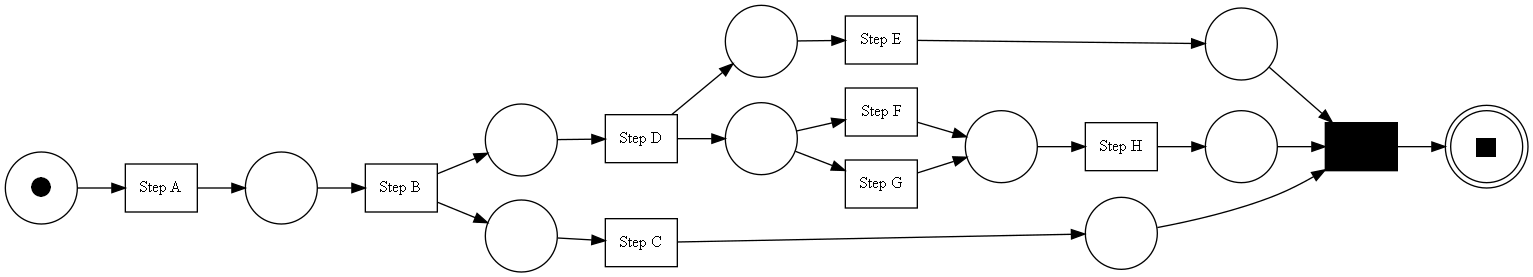

replaying log with TBR, completed variants ::   0%|          | 0/8 [00:00<?, ?it/s]

In [8]:
dataframe = pd.read_csv("event_log.csv", sep=';')
dataframe = pm4py.format_dataframe(dataframe, case_id='LogID', activity_key='Event', timestamp_key='Time')
bpmn = pm4py.read_bpmn('resources/bpmn.bpmn')
net, im, fm = pm4py.convert_to_petri_net(bpmn)
pm4py.view_petri_net(net, im, fm)
trace = pm4py.conformance_diagnostics_token_based_replay(dataframe, net, im, fm)

In [9]:
data_no_list = list(range(len(trace)+1))
print(data_no_list)
actual_list = list()
actual_list.append(0)
for traces in trace:
    trace_fitness = traces['trace_fitness'] * 100
    print(trace_fitness)
    actual_list.append(trace_fitness)
plt.plot(data_no_list, actual_list)
plt.xlabel("Number of Simulation(s)")
plt.ylabel("Conformance fitness")

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30]
100.0
100.0
100.0
100.0
100.0
100.0
100.0
100.0
100.0
100.0
100.0
100.0
100.0
100.0
100.0
100.0
100.0
100.0
100.0
100.0
100.0
100.0
100.0
100.0
100.0
100.0
100.0
100.0
100.0
100.0


computing precision with alignments, completed variants ::   0%|          | 0/6 [00:00<?, ?it/s]

0


computing precision with alignments, completed variants ::   0%|          | 0/6 [00:00<?, ?it/s]

1


computing precision with alignments, completed variants ::   0%|          | 0/10 [00:00<?, ?it/s]

replaying log with TBR, completed variants ::   0%|          | 0/2 [00:00<?, ?it/s]

2


computing precision with alignments, completed variants ::   0%|          | 0/12 [00:00<?, ?it/s]

replaying log with TBR, completed variants ::   0%|          | 0/3 [00:00<?, ?it/s]

3


computing precision with alignments, completed variants ::   0%|          | 0/12 [00:00<?, ?it/s]

replaying log with TBR, completed variants ::   0%|          | 0/3 [00:00<?, ?it/s]

4


computing precision with alignments, completed variants ::   0%|          | 0/15 [00:00<?, ?it/s]

replaying log with TBR, completed variants ::   0%|          | 0/4 [00:00<?, ?it/s]

5


computing precision with alignments, completed variants ::   0%|          | 0/17 [00:00<?, ?it/s]

replaying log with TBR, completed variants ::   0%|          | 0/5 [00:00<?, ?it/s]

6


computing precision with alignments, completed variants ::   0%|          | 0/17 [00:00<?, ?it/s]

replaying log with TBR, completed variants ::   0%|          | 0/5 [00:00<?, ?it/s]

7


computing precision with alignments, completed variants ::   0%|          | 0/20 [00:00<?, ?it/s]

replaying log with TBR, completed variants ::   0%|          | 0/6 [00:00<?, ?it/s]

8


computing precision with alignments, completed variants ::   0%|          | 0/22 [00:00<?, ?it/s]

replaying log with TBR, completed variants ::   0%|          | 0/7 [00:00<?, ?it/s]

9


computing precision with alignments, completed variants ::   0%|          | 0/23 [00:00<?, ?it/s]

replaying log with TBR, completed variants ::   0%|          | 0/8 [00:00<?, ?it/s]

10


computing precision with alignments, completed variants ::   0%|          | 0/23 [00:00<?, ?it/s]

replaying log with TBR, completed variants ::   0%|          | 0/8 [00:00<?, ?it/s]

11


computing precision with alignments, completed variants ::   0%|          | 0/23 [00:00<?, ?it/s]

replaying log with TBR, completed variants ::   0%|          | 0/8 [00:00<?, ?it/s]

12


computing precision with alignments, completed variants ::   0%|          | 0/23 [00:00<?, ?it/s]

replaying log with TBR, completed variants ::   0%|          | 0/8 [00:00<?, ?it/s]

13


computing precision with alignments, completed variants ::   0%|          | 0/23 [00:00<?, ?it/s]

replaying log with TBR, completed variants ::   0%|          | 0/8 [00:00<?, ?it/s]

14


computing precision with alignments, completed variants ::   0%|          | 0/23 [00:00<?, ?it/s]

replaying log with TBR, completed variants ::   0%|          | 0/8 [00:00<?, ?it/s]

15


computing precision with alignments, completed variants ::   0%|          | 0/23 [00:00<?, ?it/s]

replaying log with TBR, completed variants ::   0%|          | 0/8 [00:00<?, ?it/s]

16


computing precision with alignments, completed variants ::   0%|          | 0/23 [00:00<?, ?it/s]

replaying log with TBR, completed variants ::   0%|          | 0/8 [00:00<?, ?it/s]

17


computing precision with alignments, completed variants ::   0%|          | 0/23 [00:00<?, ?it/s]

replaying log with TBR, completed variants ::   0%|          | 0/8 [00:00<?, ?it/s]

18


computing precision with alignments, completed variants ::   0%|          | 0/23 [00:00<?, ?it/s]

replaying log with TBR, completed variants ::   0%|          | 0/8 [00:00<?, ?it/s]

19


computing precision with alignments, completed variants ::   0%|          | 0/23 [00:00<?, ?it/s]

replaying log with TBR, completed variants ::   0%|          | 0/8 [00:00<?, ?it/s]

20


computing precision with alignments, completed variants ::   0%|          | 0/23 [00:00<?, ?it/s]

replaying log with TBR, completed variants ::   0%|          | 0/8 [00:00<?, ?it/s]

21


computing precision with alignments, completed variants ::   0%|          | 0/23 [00:00<?, ?it/s]

replaying log with TBR, completed variants ::   0%|          | 0/8 [00:00<?, ?it/s]

22


computing precision with alignments, completed variants ::   0%|          | 0/23 [00:00<?, ?it/s]

replaying log with TBR, completed variants ::   0%|          | 0/8 [00:00<?, ?it/s]

23


computing precision with alignments, completed variants ::   0%|          | 0/23 [00:00<?, ?it/s]

replaying log with TBR, completed variants ::   0%|          | 0/8 [00:00<?, ?it/s]

24


computing precision with alignments, completed variants ::   0%|          | 0/23 [00:00<?, ?it/s]

replaying log with TBR, completed variants ::   0%|          | 0/8 [00:00<?, ?it/s]

25


computing precision with alignments, completed variants ::   0%|          | 0/23 [00:00<?, ?it/s]

replaying log with TBR, completed variants ::   0%|          | 0/8 [00:00<?, ?it/s]

26


computing precision with alignments, completed variants ::   0%|          | 0/23 [00:00<?, ?it/s]

replaying log with TBR, completed variants ::   0%|          | 0/8 [00:00<?, ?it/s]

27


computing precision with alignments, completed variants ::   0%|          | 0/23 [00:00<?, ?it/s]

replaying log with TBR, completed variants ::   0%|          | 0/8 [00:00<?, ?it/s]

28


computing precision with alignments, completed variants ::   0%|          | 0/23 [00:00<?, ?it/s]

replaying log with TBR, completed variants ::   0%|          | 0/8 [00:00<?, ?it/s]

29
finished


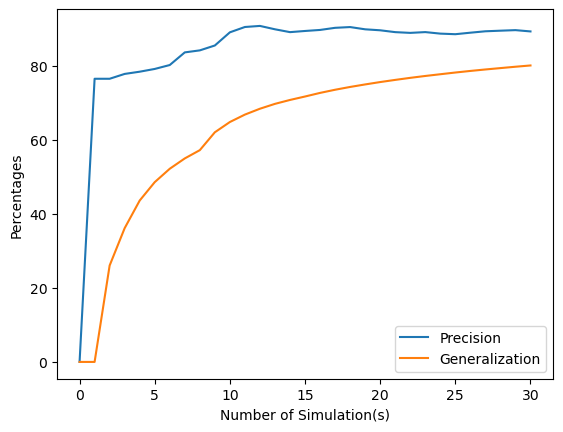

In [16]:
from pm4py.algo.evaluation.generalization import algorithm as generalization_evaluator
from pm4py.algo.evaluation.simplicity import algorithm as simplicity_evaluator
from pm4py.algo.conformance.alignments.edit_distance import algorithm as logs_alignments
from pm4py.algo.conformance.alignments.decomposed import algorithm as decomp_alignments
import time
import warnings
warnings.filterwarnings("ignore", category=DeprecationWarning)
from pandas.core.common import SettingWithCopyWarning

warnings.simplefilter(action="ignore", category=SettingWithCopyWarning)

dataframe = pd.read_csv("event_log.csv", sep=';')
#Getting the maximum number of the logs
maxcolumn = dataframe["LogID"].max()
bpmn = pm4py.read_bpmn('resources/bpmn.bpmn')
net, im, fm = pm4py.convert_to_petri_net(bpmn)
loop_index = 0
data_no_list = list(range(len(trace)+1))
prec_data = list()
prec_data.append(0)
gen_data = list()
gen_data.append(0)
while loop_index < maxcolumn:
    dataframe_query = dataframe.query('LogID <= '+str(loop_index+1))
    dataframe_query = pm4py.format_dataframe(dataframe_query, case_id='LogID', activity_key='Event', timestamp_key='Time')
    prec = pm4py.precision_alignments(dataframe_query, net, im, fm)
    gen = generalization_evaluator.apply(dataframe_query, net, im, fm)
    prec_data.append(prec*100)
    gen_data.append(gen*100)
    print(loop_index)
    loop_index = loop_index + 1
print("finished")

plt.plot(data_no_list, prec_data, label="Precision")
plt.plot(data_no_list, gen_data, label="Generalization")
plt.xlabel("Number of Simulation(s)")
plt.ylabel("Percentages")
plt.legend()
plt.show()
    
# dataframe = dataframe.query('LogID <= '+str(30))
# dataframe = pm4py.format_dataframe(dataframe, case_id='LogID', activity_key='Event', timestamp_key='Time')
# bpmn = pm4py.read_bpmn('resources/bpmn.bpmn')
# net, im, fm = pm4py.convert_to_petri_net(bpmn)
# aligned_traces = pm4py.conformance_diagnostics_alignments(dataframe, net, im, fm)
# fitness = pm4py.fitness_token_based_replay(dataframe, net, im, fm)
# prec = pm4py.precision_alignments(dataframe, net, im, fm)
# gen = generalization_evaluator.apply(dataframe, net, im, fm)


# simulated_log = pm4py.play_out(net, im, fm)
# alignments = logs_alignments.apply(dataframe, simulated_log)

# conf = decomp_alignments.apply(dataframe, net, im, fm, parameters={decomp_alignments.Variants.RECOMPOS_MAXIMAL.value.Parameters.PARAM_THRESHOLD_BORDER_AGREEMENT: 50})

# print(conf)
# print(alignments)
# print(aligned_traces)
# print(fitness)
# print(prec)
# print(gen)